In [1]:
import pandas as pd
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import csv
from scipy.spatial.distance import cdist
#from plotDecBoundaries import plotDecBoundaries

import csv
import numpy as np

def openFile(dataset):
    # Open the csv file and store it in a list
    with open(dataset, "r") as Feat_Train:
        Feat_Train_Reader = csv.reader(Feat_Train, delimiter=',')
        next(Feat_Train_Reader)  # Skip the first row (labels)
        x = []
        labels = []
        for row in Feat_Train_Reader:
            if len(row) != 0:
                # Convert values in row to floats
                row_float = [float(value) for value in row]
                #x.append(row_float[:-1])  # Include all columns except the last (label)
                x.append(row_float[:])
                labels.append(row_float[-1])  # Last column is the label
    Feat_Train.close()
    return np.array(x), np.array(labels)


In [2]:
import numpy as np

def get_update(X, y, weights, eta):
    #print(weights)
    raw_score = np.dot(X, weights)
    #print("shape of y in get_update is", y.shape)
    if raw_score * y <= 0:
        return eta * y * X
    return np.zeros_like(weights)

def perceptron_learning(x, labels, w_int=np.array([1.0, 1.0, 1.0]), max_iterations=1000, eta=1):
    Js = []
    error_rates = []
    weights = w_int  # Use a single weight vector that gets updated
    w_hat = []
    w_hat.append(weights)
    #print(weights)
    h1 = False
    h2 = False
    
    X = x[:, :-1].astype(float)
    y = x[:, -1].astype(float)    #last column
    labels = y
    for i in range(len(labels)):
        if labels[i] == 2:
            labels[i] = -1
    #print(labels)
    X = np.insert(X, 0, 1, axis=1)  # adding bias term to x
    N = len(x)
    num_iterations = 0
    

    while num_iterations < max_iterations:
        update_sum = np.zeros_like(weights)  # Initialize cumulative update
        #print("shape of update_sum", update_sum.shape)
        misclassified_count = 0
        
        for i in range(N):
            #print(y[i])
            update = get_update(X[i], y[i], weights, eta)
            update_sum += update
            
            # Check if data point is misclassified
            if np.dot(X[i], weights) * y[i] <= 0:
                misclassified_count += 1

        #print("Number of misclassifications:", misclassified_count )
                
        # Apply the cumulative update after evaluating all samples
        weights += update_sum
        w_hat.append(weights)
        
        # Append the misclassified count and compute error rates
        Js.append(misclassified_count)
        error_rates.append(misclassified_count / N)
        
        if misclassified_count == 0:
            print("Convergence achieved")
            h1 = True    #(h1) All training data points are correctly classified
            print("h1 condition met, all training data points are correctly classified")
            break
        
        num_iterations += 1

    print("Number of iterations performed:", num_iterations)
    if num_iterations == 1000:
        h2 = True   #(h2) 1000 iterations have been reached
        print("h2 condition met, 1000 iterations have been reached")
    error_rates = np.array(error_rates)
    #print("shape of error_rates", error_rates.shape)
    #w_hat = np.array(weights)
    print("Weight vector is :", w_hat[-1])
    print("No. of misclassified data points are:" , misclassified_count)
    print("Error rates:"  , error_rates[-1])
    return np.array(w_hat), Js, error_rates

def classification_accuracy(error_rate, ):
    print("The classification accuracy is:" , (1 - error_rate)*100)
 


In [3]:
def plot_linear_learning(x, labels, w_hat, Js, error_rates):
    """
    Plot training curve, and visualize the decision boundry
    Args:
        x: (N, D) data array, non-augmented format
        labels:  lengnth array with labels 1, 2
        w_hat: final learned weights.
        Js: length N_epochs of Loss values (the learning curve)
        error_rates: length N_epochs of misclassification rates as the algorithm learned
    """
    #X = x[:, :-1].astype(float)
    y = x[:, -1].astype(float)    #last column
    labels = y
    #print(w_hat)
            
    #X = np.insert(X, 0, 1, axis=1)
    
    N_epochs = len(Js)
    x_1 = x[labels==1]
    #print("X1:", x_1)
    x_2 = x[labels==2]

    fig, ax = plt.subplots(1, 2, sharex=False, figsize=(12, 6))

    ## scatter plot with deciscion boundaries
    LIMIT = np.max(x)
    x_plot = np.arange(-1 * LIMIT, LIMIT, 0.01)
    ax[0].scatter(x_1.T[0], x_1.T[1], fc=(0, 0, 1, 0.5), label='class 1')
    ax[0].scatter(x_2.T[0], x_2.T[1], fc=(1, 0, 0, 0.5), label='class 2')
    #plot 2-class linear decision boundary
    #print("W hat one is:", w_hat[1])
   
    ax[0].plot( x_plot, -1 * ( w_hat[1] *  x_plot  + w_hat[0] )
                                     / w_hat[2], linewidth=2, label='boundry')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_xlim([-LIMIT, LIMIT])
    ax[0].set_ylim([-LIMIT, LIMIT])
    ax[0].legend()
    ax[0].grid(':')

    ## Learning curve
    epochs = np.arange(N_epochs)
    ax[1].plot(epochs, Js, marker='o', color='green', label='J (Loss)')
    # add second y-axis for the metric of error rate: https://pythonguides.com/matplotlib-two-y-axes/
    ax2 = ax[1].twinx() 
    ax2.plot(epochs, error_rates * 100, marker='x', color='purple', label='Error Rate')
    ax[1].set_ylabel('J (Loss)', color = 'green') 
    ax[1].tick_params(axis ='y', labelcolor = 'green') 
    ax2.set_ylabel('Error rate (%)', color = 'purple') 
    ax2.tick_params(axis ='y', labelcolor = 'purple') 

    # ax[1].set_xlabel('epoch')
    # ax[1].set_ylabel('J (Loss)')
    ax2.set_ylabel('error rate (%)')
    ax[0].legend()
    ax[1].grid(':')



In [4]:
def perceptron_testing(x, labels, w_hat):
    '''
    Implements the perceptron testing.

    Args:
        x: (N, D) data array, non-augmented format.
        labels: Array of length N with labels 1, 2.
        w_hat: final learned weights as a numpy array.
    Returns:
        error_rates: Misclassification rates.
        
        
    '''
    X = x[:, :-1].astype(float)
    y = x[:, -1].astype(float)    #last column
    labels = y
    misclassified_count = 0
    
    error_rates = []
    for i in range(len(labels)):
        if labels[i] == 2:
            labels[i] = -1
    #print(labels)
    X = np.insert(X, 0, 1, axis=1)  # adding bias term to x
    N =len(X)
    #count = 0
    for i in range(len(labels)):
            # Check if data point is misclassified
        if np.dot(X[i], w_hat ) * y[i] <= 0:    #w_hat[count]
            misclassified_count += 1
    error_rates.append(misclassified_count / N)       #Please check what exactly we are supposed to do here.
    print("No. of misclassified points are:", misclassified_count)
    print("Error rate is", error_rates[-1])

    ########################
    # your code comes here
    ########################
    return error_rates

def plot_linear_testing(x, labels, w_hat):
    """
    Visualize the decision boundary of testing sets
    Args:
    x: (N, D) data array, non-augmented format
    labels:  lengnth array with labels 1, 2
    w_hat: final learned weights as a numpy array.
    """
  
    x_1 = x[labels==1]
    x_2 = x[labels==2]

    fig, ax = plt.subplots(1, 2, sharex=False, figsize=(12, 6))

    ## scatter plot with decision boundaries
    
    LIMIT = np.max(x)

    
    x_plot = np.arange(-1 * LIMIT, LIMIT, 0.01)
    ax[0].scatter(x_1.T[0], x_1.T[1], fc=(0, 0, 1, 0.5), label='class 1')
    ax[0].scatter(x_2.T[0], x_2.T[1], fc=(1, 0, 0, 0.5), label='class 2')
    #plot 2-class linear decision boundary
    ax[0].plot( x_plot, -1 * ( w_hat[1] *  x_plot  + w_hat[0] ) 
                                    / w_hat[2], linewidth=2, label='boundry')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    ax[0].set_xlim([-LIMIT, LIMIT])
    ax[0].set_ylim([-LIMIT, LIMIT])
    ax[0].legend()
    ax[0].grid(':')




--------------start training----------------------
Convergence achieved
h1 condition met, all training data points are correctly classified
Number of iterations performed: 5
Weight vector is : [ 5.         33.23672973 47.66584862]
No. of misclassified data points are: 0
Error rates: 0.0
The classification accuracy is: 100.0
--------------start testing----------------------
No. of misclassified points are: 0
Error rate is 0.0
The classification accuracy is: 100.0


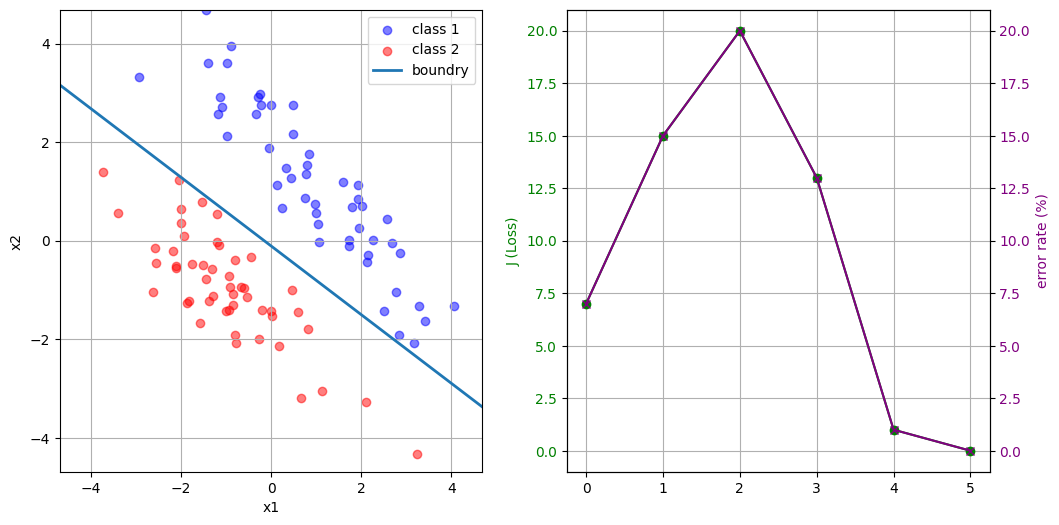

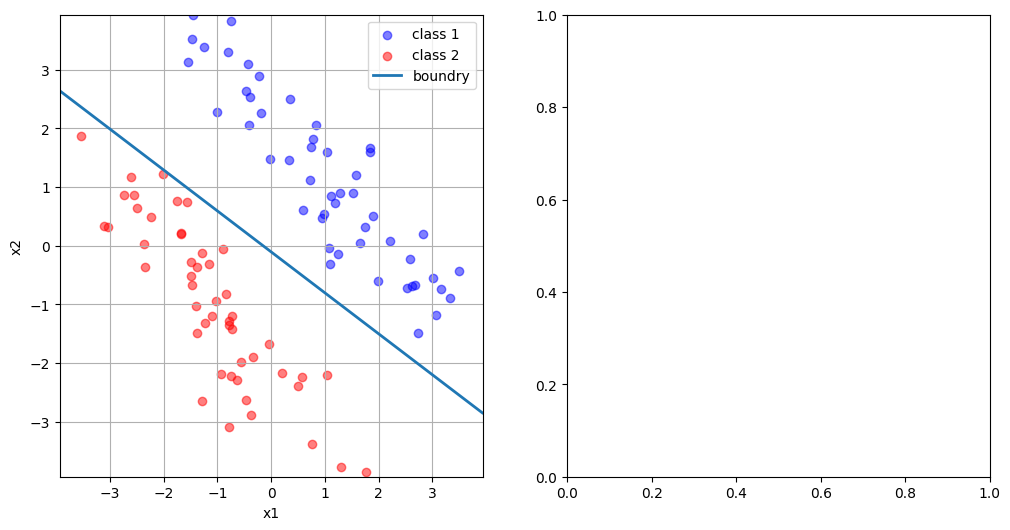

In [ ]:
x1, labels1 = openFile("ee559_dataset/dataset1_train.csv")
print("--------------start training----------------------")
w_hat1, Js1, error_rates1 = perceptron_learning(x1, labels1)
plot_linear_learning(x1, labels1, w_hat1[-1], Js1, error_rates1)
classification_accuracy(error_rates1[-1])

xt1, labelst1 = openFile("ee559_dataset/dataset1_test.csv")
print("--------------start testing----------------------")
error_ratet1 = perceptron_testing(xt1, labelst1, w_hat1[-1])    #x and labels augmentation
classification_accuracy(error_ratet1[-1])
plot_linear_testing(xt1, labelst1, w_hat1[-1])
plt.show()


--------------start training----------------------
Convergence achieved
h1 condition met, all training data points are correctly classified
Number of iterations performed: 79
Weight vector is : [-15.          -5.02449684 236.25580239]
No. of misclassified data points are: 0
Error rates: 0.0
The classification accuracy is: 100.0
--------------start testing----------------------
No. of misclassified points are: 4
Error rate is 0.04
The classification accuracy is: 96.0


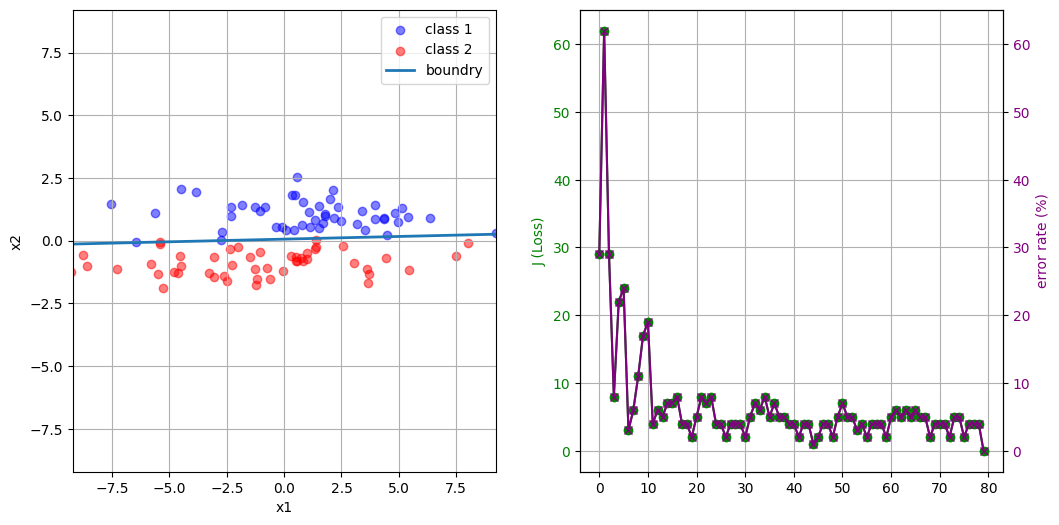

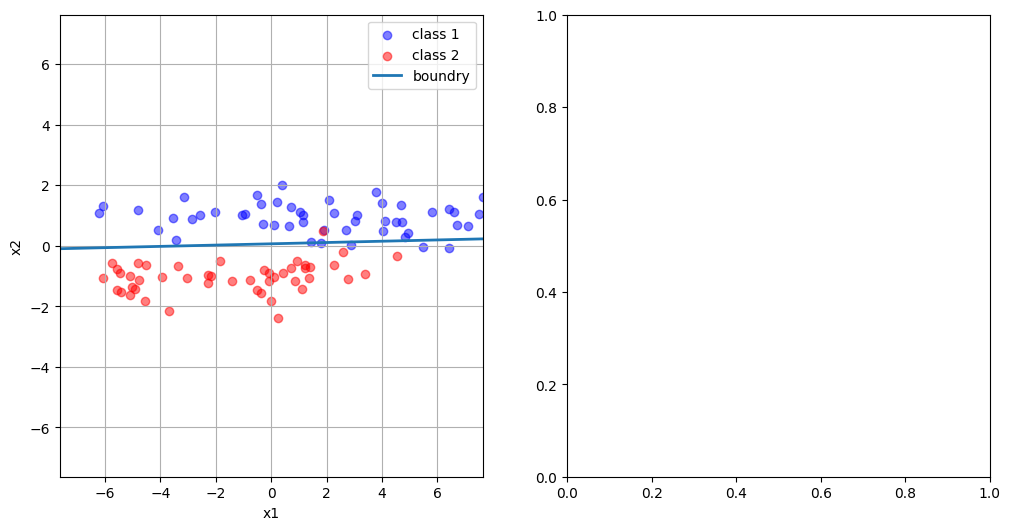

In [5]:
x2, labels2 = openFile("ee559_dataset/dataset2_train.csv")
print("--------------start training----------------------")
w_hat2, Js2, error_rates2 = perceptron_learning(x2, labels2)
plot_linear_learning(x2, labels2, w_hat2[-1], Js2, error_rates2)
classification_accuracy(error_rates2[-1])

xt2, labelst2 = openFile("ee559_dataset/dataset2_test.csv")
print("--------------start testing----------------------")
error_rate2t = perceptron_testing(xt2, labelst2, w_hat2[-1])    #x and labels augmentation
classification_accuracy(error_rate2t[-1])
plot_linear_testing(xt2, labelst2, w_hat2[-1])
plt.show()


--------------start training----------------------


Number of iterations performed: 1000
h2 condition met, 1000 iterations have been reached
Weight vector is : [-84.          25.21027779   6.47991693]
No. of misclassified data points are: 23
Error rates: 0.23
The classification accuracy is: 77.0
--------------start testing----------------------
No. of misclassified points are: 55
Error rate is 0.55
The classification accuracy is: 44.99999999999999


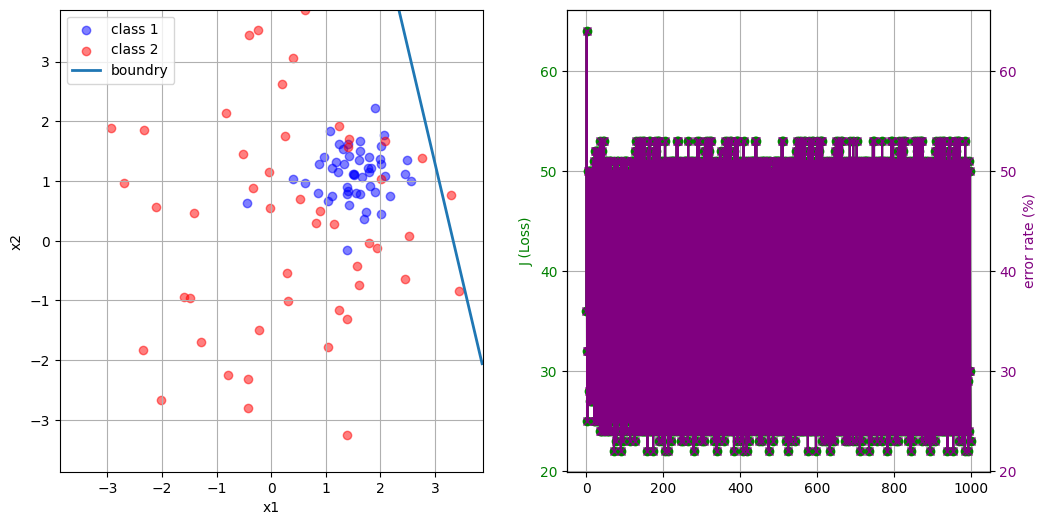

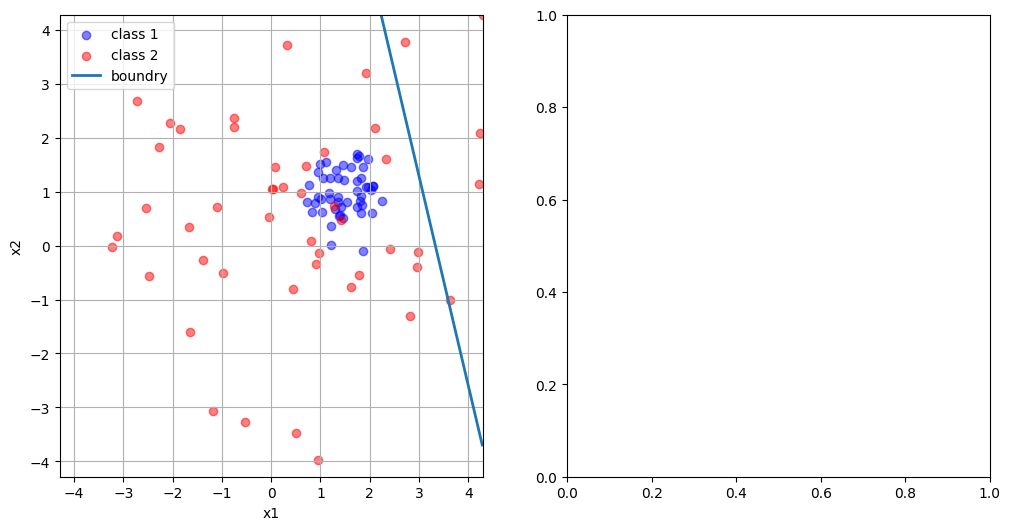

In [ ]:
x3, labels3 = openFile("ee559_dataset/dataset3_train.csv")
print("--------------start training----------------------")
w_hat3, Js3, error_rates3 = perceptron_learning(x3, labels3)
plot_linear_learning(x3, labels3, w_hat3[-1], Js3, error_rates3)
classification_accuracy(error_rates3[-1])

xt3, labelst3 = openFile("ee559_dataset/dataset3_test.csv")
print("--------------start testing----------------------")
error_rate3 = perceptron_testing(xt3, labelst3, w_hat3[-1])    #x and labels augmentation
classification_accuracy(error_rate3[-1])
plot_linear_testing(xt3, labelst3, w_hat3[-1])
plt.show()


eta=10

--------------start training----------------------
Convergence achieved
h1 condition met, all training data points are correctly classified
Number of iterations performed: 4
Weight vector is : [201.         475.10078513 438.22646108]
No. of misclassified data points are: 0
Error rates: 0.0


The classification accuracy is: 100.0
--------------start testing----------------------
No. of misclassified points are: 0
Error rate is 0.0
The classification accuracy is: 100.0


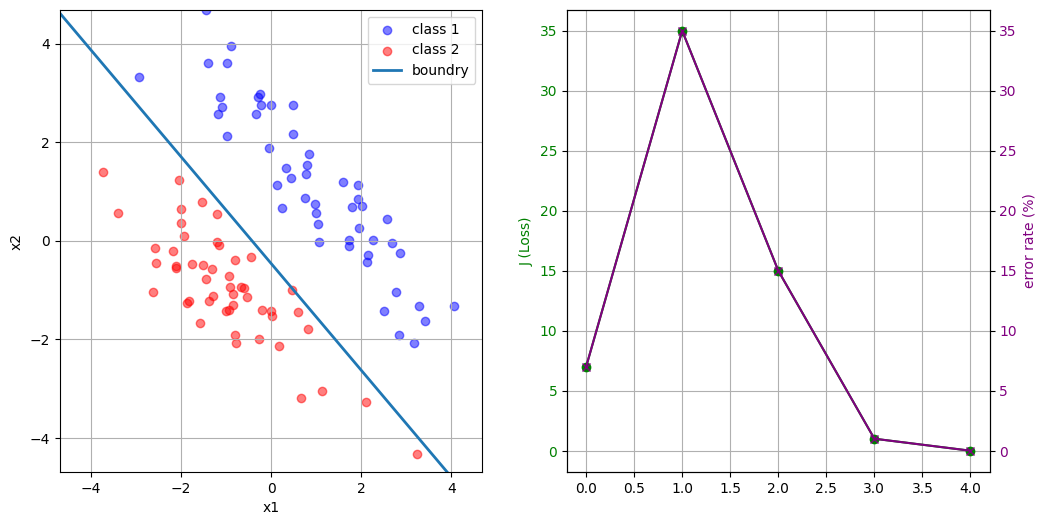

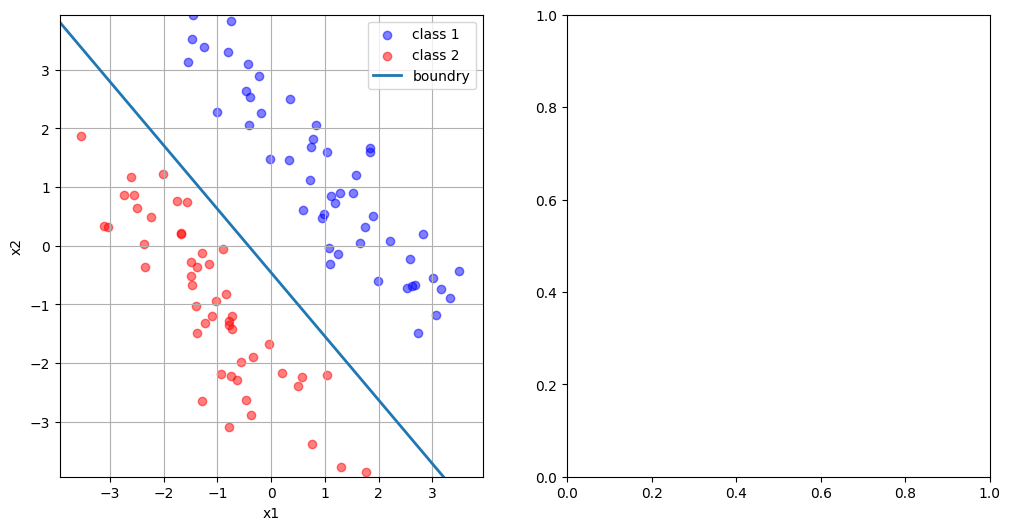

In [ ]:
x, labels = openFile("ee559_dataset/dataset1_train.csv")
print("--------------start training----------------------")
w_hat, Js, error_rates = perceptron_learning(x, labels, eta = 10)
plot_linear_learning(x, labels, w_hat[-1], Js, error_rates)
classification_accuracy(error_rates[-1])

xt, labelst = openFile("ee559_dataset/dataset1_test.csv")
print("--------------start testing----------------------")
error_rate = perceptron_testing(xt, labelst, w_hat[-1])    #x and labels augmentation
classification_accuracy(error_rate[-1])
plot_linear_testing(xt, labelst, w_hat[-1])
plt.show()


--------------start training----------------------
Convergence achieved
h1 condition met, all training data points are correctly classified
Number of iterations performed: 71
Weight vector is : [-159.          -52.42824141 2289.68380068]
No. of misclassified data points are: 0
Error rates: 0.0
Js: 72


The classification accuracy is: 100.0
--------------start testing----------------------
No. of misclassified points are: 5
Error rate is 0.05
The classification accuracy is: 95.0


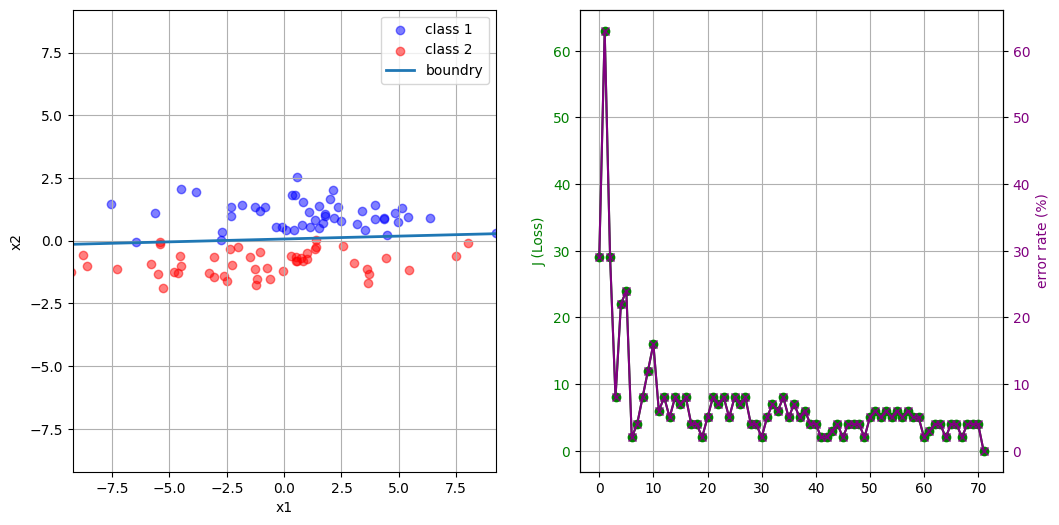

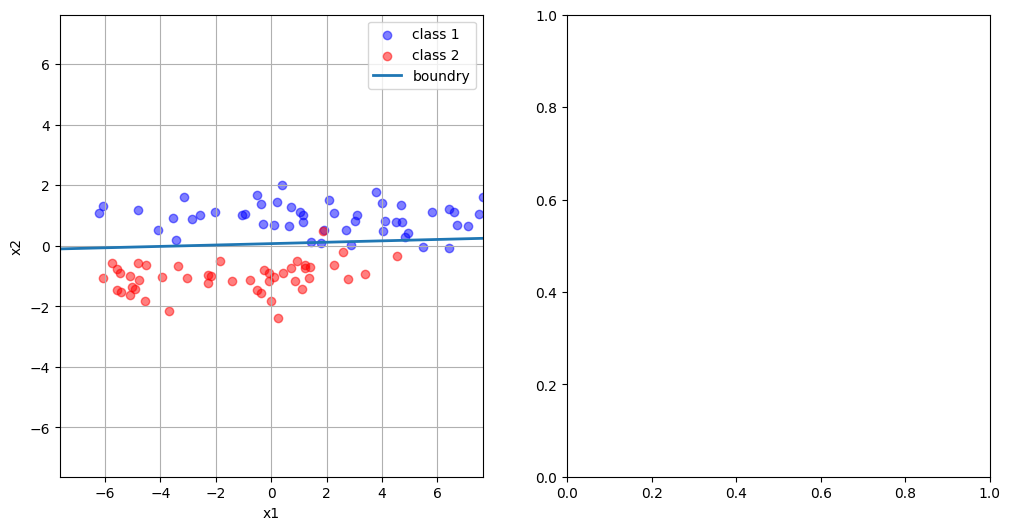

In [ ]:
x, labels = openFile("ee559_dataset/dataset2_train.csv")
print("--------------start training----------------------")
w_hat, Js, error_rates = perceptron_learning(x, labels, eta = 10)
print("Js:", len(Js))
plot_linear_learning(x, labels, w_hat[-1], Js, error_rates)
classification_accuracy(error_rates[-1])

xt, labelst = openFile("ee559_dataset/dataset2_test.csv")
print("--------------start testing----------------------")
error_rate = perceptron_testing(xt, labelst, w_hat[-1])    #x and labels augmentation
classification_accuracy(error_rate[-1])
plot_linear_testing(xt, labelst, w_hat[-1])
plt.show()


--------------start training----------------------


Number of iterations performed: 1000
h2 condition met, 1000 iterations have been reached
Weight vector is : [-899.          282.07428114  102.02264818]
No. of misclassified data points are: 25
Error rates: 0.25
The classification accuracy is: 75.0
--------------start testing----------------------
No. of misclassified points are: 55
Error rate is 0.55
The classification accuracy is: 44.99999999999999


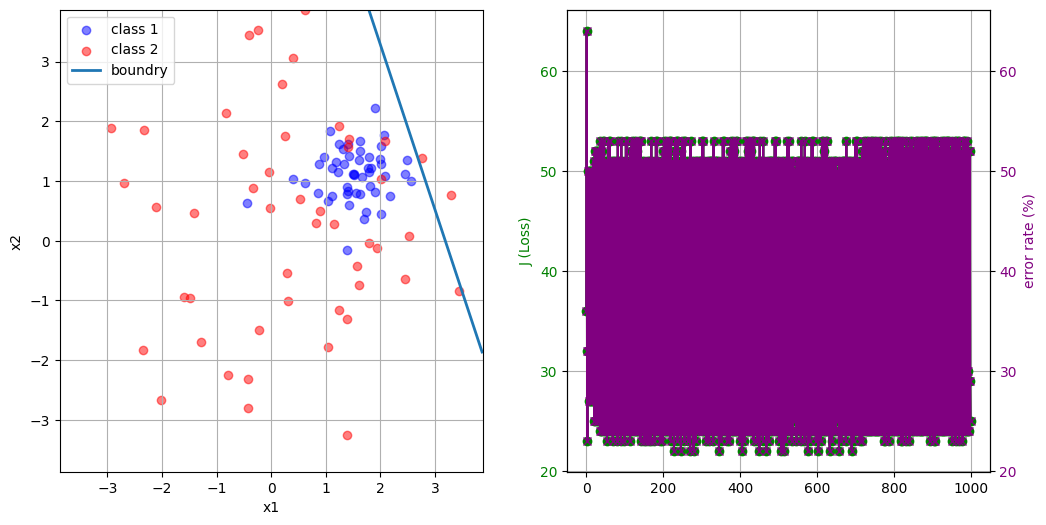

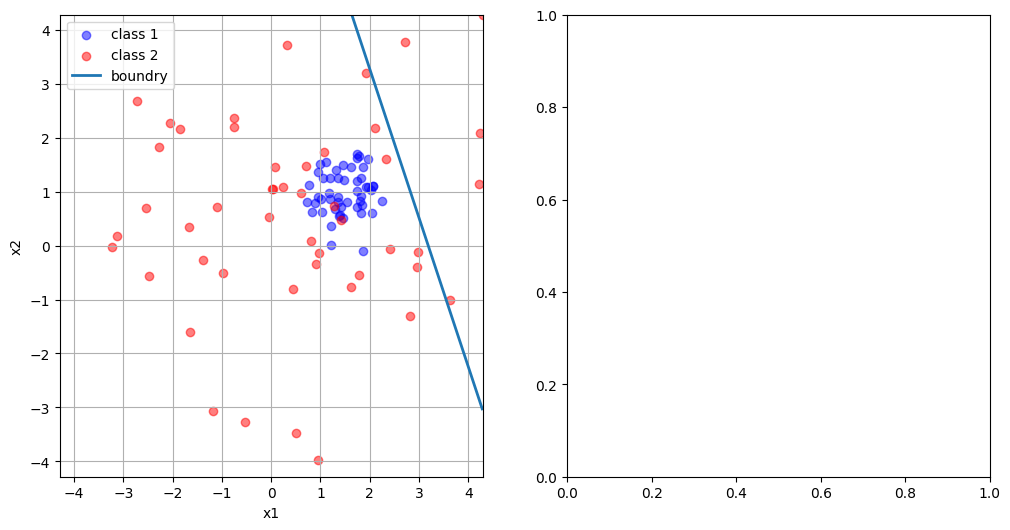

In [ ]:
x, labels = openFile("ee559_dataset/dataset3_train.csv")      #eta = 10
print("--------------start training----------------------")
w_hat, Js, error_rates = perceptron_learning(x, labels, eta = 10)
plot_linear_learning(x, labels, w_hat[-1], Js, error_rates)
classification_accuracy(error_rates[-1])

xt, labelst = openFile("ee559_dataset/dataset3_test.csv")
print("--------------start testing----------------------")
error_rate = perceptron_testing(xt, labelst, w_hat[-1])    #x and labels augmentation
classification_accuracy(error_rate[-1])
plot_linear_testing(xt, labelst, w_hat[-1])
plt.show()


Ques d)
Comment on the performance of perceptron on the 3 datasets (that is, compare
across the 3 datasets and explain similarities and differences

In dataset 1, we got a misclassification rate of 0% on the test data, suggesting the data was linearly separable and the learning was done right in 5 iterations
In dataset 2, we got a misclassification rate of 96% on the test data, suggesting the data was almost linearly separable and the learning was done right in 80 iterations
In dataset 3, we got a misclassification rate of 55% on the test data, suggesting the data was not linearly separable and the learning was done right in 1000 iterations suggesting it is not possible to converge 
e) When we pass eta=10, that is, when the learning rate is higher, we observe that the error rates remain the same as expected but the train data converges quickly.)